In [1]:
## Based on
#  - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 
#  - https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Local data cache
datadir = '../common-data/covid/'
datafile = datadir + "data.csv"

In [29]:
# Read data from local file
data = pd.read_csv(datafile, parse_dates=['date'])
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398852 entries, 0 to 398851
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    398852 non-null  datetime64[ns]
 1   county  398852 non-null  object        
 2   state   398852 non-null  object        
 3   fips    394858 non-null  float64       
 4   cases   398852 non-null  int64         
 5   deaths  398852 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 18.3+ MB


In [31]:
# Finding the number of cases in a state and county
condition = (data['state'] =='South Carolina') 
data_sc = data[condition]

In [32]:
# See a sample
data_sc.head()

,date,county,state,fips,cases,deaths
637,2020-03-06,Charleston,South Carolina,45019.0,1,0
638,2020-03-06,Kershaw,South Carolina,45055.0,1,0
729,2020-03-07,Charleston,South Carolina,45019.0,1,0
730,2020-03-07,Kershaw,South Carolina,45055.0,1,0
838,2020-03-08,Charleston,South Carolina,45019.0,1,0


In [33]:
# Get its statistics
data_sc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6280 entries, 637 to 398070
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6280 non-null   datetime64[ns]
 1   county  6280 non-null   object        
 2   state   6280 non-null   object        
 3   fips    6280 non-null   float64       
 4   cases   6280 non-null   int64         
 5   deaths  6280 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 343.4+ KB


In [34]:
# Seeing visually if there is a relationship between cases and deaths
import matplotlib.pyplot as plt
%matplotlib inline

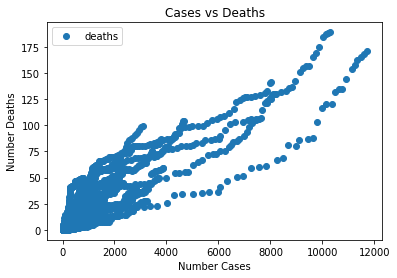

In [35]:
data_sc.plot(x='cases', y='deaths', style='o')
plt.title('Cases vs Deaths')
plt.xlabel('Number Cases')
plt.ylabel('Number Deaths')
plt.show()

In [36]:
# We will create a column to signify whether data is for Richland county or not
data_sc['richland?'] = data_sc.apply(lambda x: (1 if (x['county'] == 'Richland') else 0), axis=1 )

/Users/biplavs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
data_sc.head()

,date,county,state,fips,cases,deaths,richland?
637,2020-03-06,Charleston,South Carolina,45019.0,1,0,0
638,2020-03-06,Kershaw,South Carolina,45055.0,1,0,0
729,2020-03-07,Charleston,South Carolina,45019.0,1,0,0
730,2020-03-07,Kershaw,South Carolina,45055.0,1,0,0
838,2020-03-08,Charleston,South Carolina,45019.0,1,0,0


In [38]:
# Imports for classification
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

In [40]:
x = data_sc [['cases', 'deaths']]
y = data_sc ['richland?']

In [41]:
# Get a subset for taining and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [42]:
model = RandomForestClassifier(max_depth=2, random_state=0)

In [43]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [44]:
# Predicted values for train and test
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [45]:
CM = confusion_matrix(y_test, y_pred_test)
print (CM)

[[1235    0]
 [  21    0]]


# Now with IRIS datasets

In [46]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [47]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [48]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [57]:
x=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  
y=data['species']

In [58]:
# Get a subset for taining and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [59]:
model = RandomForestClassifier(max_depth=2, random_state=0)

In [60]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [61]:
# Predicted values for train and test
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [62]:
CM = confusion_matrix(y_test, y_pred_test)
print (CM)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
